<a href="https://colab.research.google.com/github/Prachi319/Wine-Quality-prediction-Random-forest/blob/main/wine_quality_Random_forest_classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Data collection

In [3]:
wine_dataset=pd.read_csv('/content/winequality-red.csv')
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Number of rows and columns
wine_dataset.shape

(1599, 12)

In [5]:
#Number of null values in the dataset
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Data analysis and visualization

In [6]:
#statistical measures of dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


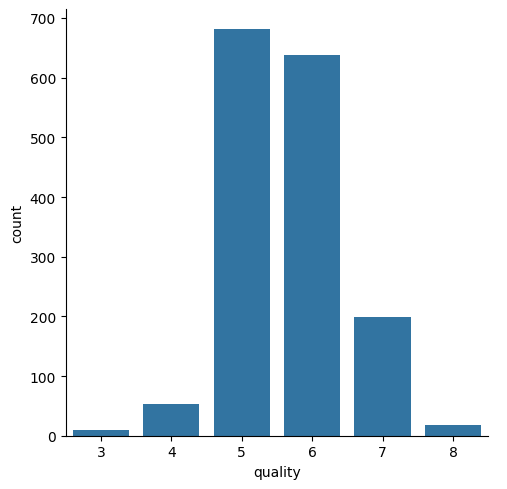

In [7]:
#number of values for each quality
sns.catplot(x='quality',data=wine_dataset,kind='count')
wine_dataset["quality"].value_counts()

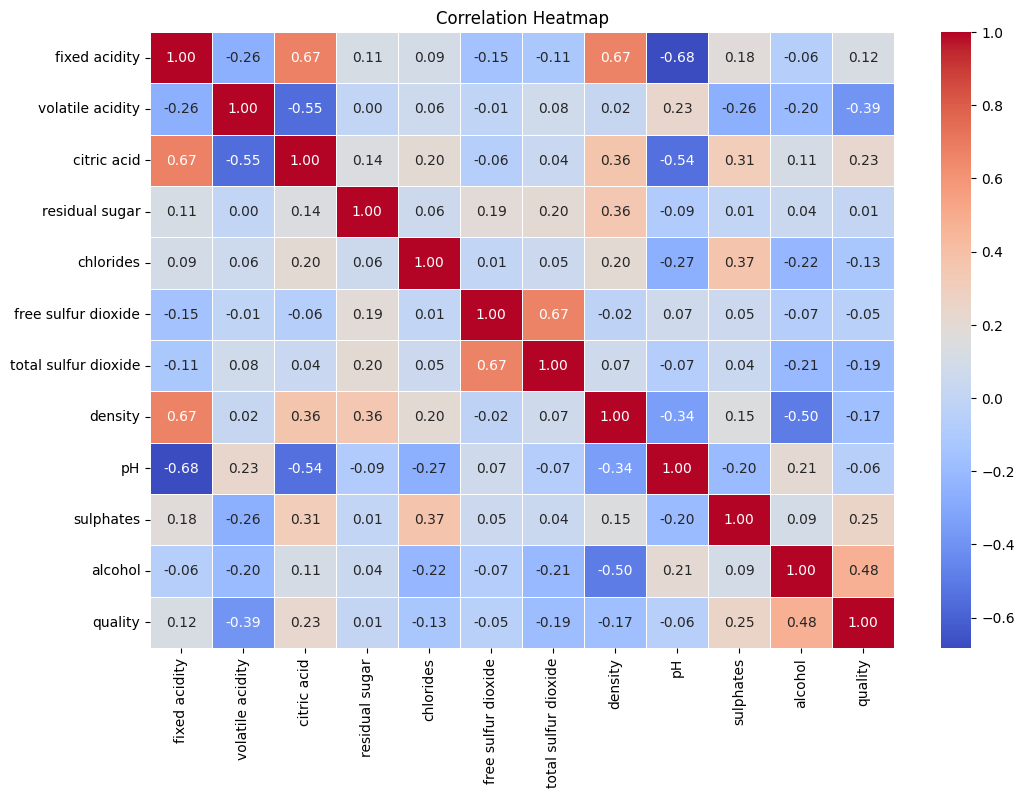

In [8]:
correlation=wine_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

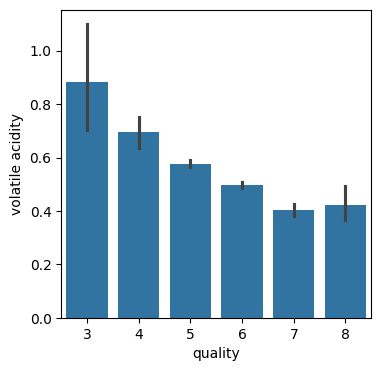

In [9]:
# Volatile acidity Vs. quality
plot=plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)

Here you can see that the highest quality of wine (7,8) is achieved when volatile acidity is is between 0.4 and 0.5.

this shows that the volatile acidity and wine quality has negative correlation, as volatile acidity incerease the quality decreases.

<Axes: xlabel='quality', ylabel='alcohol'>

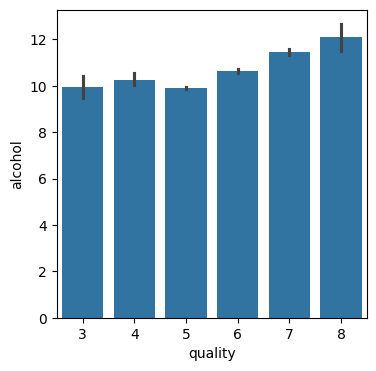

In [10]:
# Alcohol Vs. quality
plot=plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='alcohol',data=wine_dataset)

<Axes: xlabel='quality', ylabel='sulphates'>

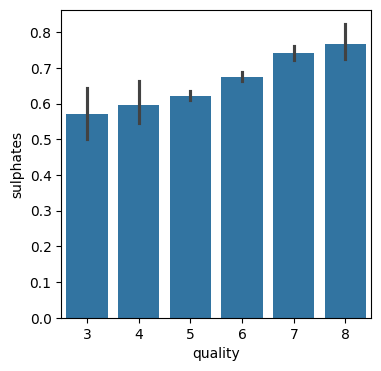

In [11]:
# Sulphates Vs. quality
plot=plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='sulphates',data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

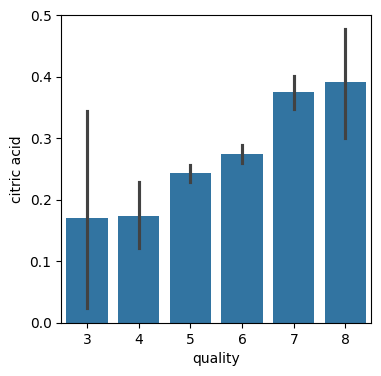

In [12]:
# Citric acid Vs. quality
plot=plt.figure(figsize=(4,4))
sns.barplot(x='quality',y='citric acid',data=wine_dataset)

Data preprocessing

In [13]:
#seperating labels and features
x=wine_dataset.drop('quality',axis=1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label binarization:

Dividing the values of labels into 2 values"good"/"bad", rather than having 6 values for labels.



In [14]:
y=wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Split the data to train and test data

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [28]:
print(y.shape,y_train.shape,y_test.shape)

(1599,) (1279,) (320,)


In [29]:
print(x.shape,x_train.shape,x_test.shape)

(1599, 11) (1279, 11) (320, 11)


Model Training

In [30]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

Accuracy test

In [31]:
prediction=model.predict(x_train)
accuracy=accuracy_score(y_train,prediction)
print('Accuracy for train data : ',accuracy)

Accuracy for train data :  1.0


In [32]:
prediction=model.predict(x_test)
accuracy=accuracy_score(y_test,prediction)
print('Accuracy for test data : ',accuracy)

Accuracy for test data :  0.91875


Cross validation:

since our model gave 100 % accuracy on test data, we need to identify if our model is overfitting.


In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.875      0.840625   0.88125    0.86875    0.87774295]
Mean accuracy: 0.8686735893416927


Additonal Metrics to check the model performance

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95       279
           1       0.73      0.59      0.65        41

    accuracy                           0.92       320
   macro avg       0.83      0.78      0.80       320
weighted avg       0.91      0.92      0.91       320



Prediction model

In [35]:
input=(6.3,0.510,0.13,2.3,0.0762,9.0,40.0,0.99574,3.42,0.75,11.0)
input_as_numpy_array=np.asarray(input)
input_reshaped=input_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_reshaped)
print(prediction)

if prediction[0]==0:
  print("The wine quality is poor")
else:
  print("Wine quality is good")

[0]
The wine quality is poor


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
